In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
results_arr = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/sim_input/results.npy')
observed_arr = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/All_Inputs/Arp256.npy')

Note, the above results are a 5000 particle run with a timestep of 0.01 and a resolution of 1.75kpc of the best fit parameters of Arp 256.

In [6]:
results_arr.shape

(5000, 12)

In [19]:
u = results_arr[:,6]
g = results_arr[:,7]
r = results_arr[:,8]
i = results_arr[:,9]
z = results_arr[:,10]

In [39]:
white_flux = u + g + r + i + z

In [40]:
x = results_arr[:,0]
y = results_arr[:,1]

In [41]:
resolution = 1.75/15

In [42]:
white_image = np.zeros([50,50])

In [43]:
x_min = (-white_image.shape[0]/2)*resolution  
x_max = (white_image.shape[0]/2)*resolution
y_min = (-white_image.shape[1]/2)*resolution
y_max = (white_image.shape[1]/2)*resolution

In [44]:
x_pixel_value = np.linspace(x_min,x_max,white_image.shape[0])
y_pixel_value = np.linspace(y_min,y_max,white_image.shape[1])

In [45]:
for i in range(len(x) - 1):
            if x[i] > x_max or x[i] < x_min:
                continue
            elif y[i] > y_max or y[i] < y_min:
                continue
            else:
                p = np.where(x[i] >= x_pixel_value)[0][-1]
                q = np.where(y[i] >= y_pixel_value)[0][-1]

                white_image[p,q] += white_flux[i]

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


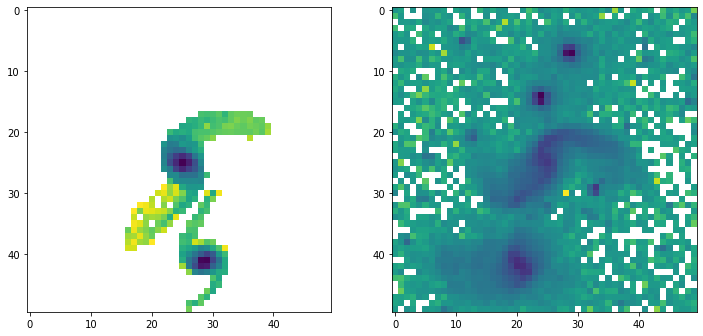

In [78]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(np.flip(-2.5*np.log10(white_image.T) - 48.6))
axes[1].imshow(-2.5*np.log10(observed_arr) - 48.6)

In [71]:
white_image_exp = np.flip(white_image.T)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


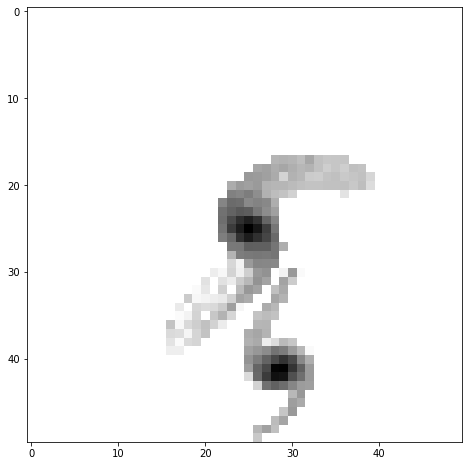

In [108]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(white_image_exp) - 48.6, cmap='gray')
np.save('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/sim_input/Arp_256_sim.npy', white_image_exp)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


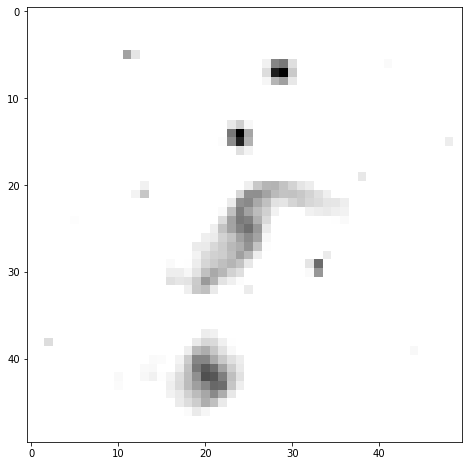

In [100]:
obs_image = observed_arr.copy()
obs_image[obs_image <= 2e-28] = 0
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(obs_image) - 48.6,cmap='gray')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


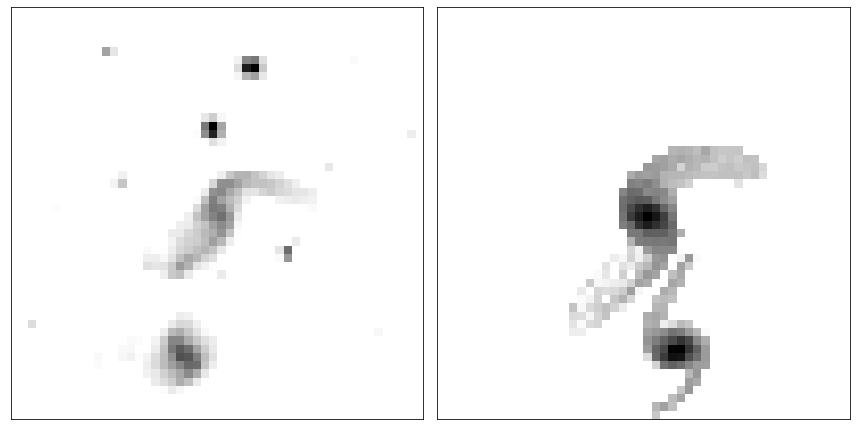

In [107]:
figure,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(-2.5*np.log10(obs_image) - 48.6,cmap='gray')
axes[1].imshow(-2.5*np.log10(white_image_exp) - 48.6,cmap='gray')
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
figure.tight_layout()
figure.savefig('C:/Users/oryan/Documents/Paper_1 - Advancing PySPAM/Arp_256.png')

In [121]:
data = {'Names' : ['Arp_256_sim'], 'Redshift':[0.0273], 'block_reduce':[1]}

In [124]:
pd.DataFrame(data).to_csv('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/sim_redshifts/Redshifts_sim.csv')